# Figure 2: Model-based quantification of intra-session dynamics of inter-run duration.

## setup and imports

In [1]:
import fnmatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import glob

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [2]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [ ]:
rat_markers = {}
sequence = {}

# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 'RatM53', 'RatM54']

m, f = 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in animalList if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in animalList if 'F' in x]), start_intensity=80)

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'o', '-']
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 'o', '-']
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")
        
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")

 

Loading data for RatF00
error loading pickle
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43
Loading data for RatM53
Loading data for RatM54


# 2ABC right simulated distribution

alpha: 1.57, gamma: 0.86
alpha: 2.96, gamma: 1.02
alpha: 1.72, gamma: 0.38


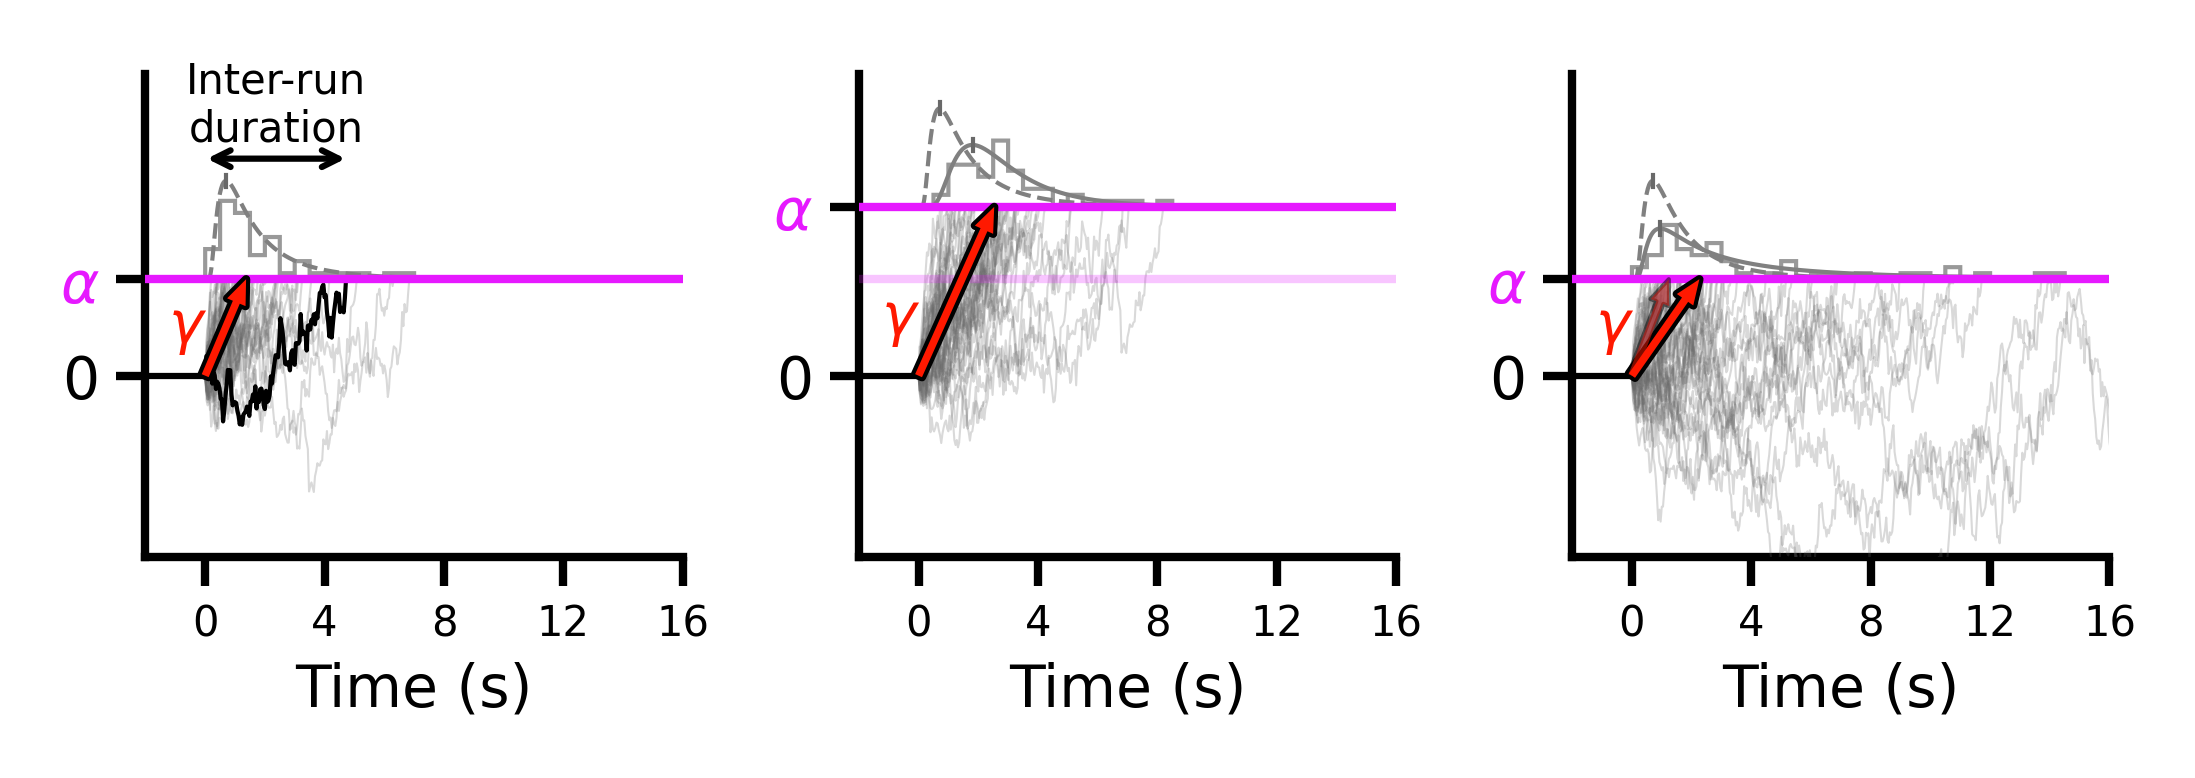

In [4]:
def Figure2_ABC_Right(ax=None, mean=.2, std=1, A=10, t0=2, N=50, 
              alphacolor=plt.get_cmap('cool_r')(0.1),
              gammacolor=plt.get_cmap('autumn')(0.1),
              plot_base_a=False, plot_base_g=False,
              base=True, xx=None, yy=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    div=2
    np.random.seed(51)
    trials = [generate_trials(mean, std, A, 0) for _ in range(N)]

    example_plot = True
    for dv in trials:
        dv[-1] = A
        x = np.arange(len(dv))/25
        y = dv
        if base:
            if 4*25 <= len(y) < 5*25 and example_plot:
                ax.plot(x, y, c='k', lw=0.5, zorder=4)
                example_plot = False

                # idle time arrow
                ax.annotate(text='', xy=(-.5, 18), xytext=(len(y)/25+.5, 18), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
                ax.annotate(text='Inter-run\nduration', xy=(0, 0), xytext=(len(y)/50, 22.5), ha='center', va='center',
                            xycoords='data', fontsize=5, zorder=5)
                
        ax.plot(x, y, c='dimgray', alpha=.25, zorder=3, lw=.25,)


    if plot_base_a:
        div=3
        ax.axhline(8, c=alphacolor, zorder=5, lw=1, alpha=.25)
        style = "Simple, head_width=.08, tail_width=0.03, head_length=.1"
        kw = dict(arrowstyle=style)
        # ax.add_patch(mpatches.FancyArrowPatch((-1.5, 8.75), (-1.5, A-.75), color=alphacolor, lw=.5,
        #                                       shrinkA=0, shrinkB=0, mutation_scale=30, zorder=9, **kw))

    if plot_base_g:
        basewaitmean = A / .25 * np.tanh(.25 * A)
        style = "Simple, head_width=.08, tail_width=0.03, head_length=.1"
        kw = dict(arrowstyle=style)
        ax.add_patch(mpatches.FancyArrowPatch((0, 0), (basewaitmean/25, A), shrinkA=0, shrinkB=0, lw=.5,
                                              edgecolor='k', mutation_scale=30, alpha=.5, zorder=9, **kw))
        ax.add_patch(mpatches.FancyArrowPatch((0, 0), (basewaitmean/25, A), shrinkA=0, shrinkB=0, lw=0,
                                                mutation_scale=30, color=gammacolor, alpha=.5, zorder=10, **kw))
    

    waits = np.array([len(t)/25 for t in trials], dtype=np.float64)
    waitmean = A / mean * np.tanh(mean * A)  #  + t0
    ax.axhline(A, c=alphacolor, zorder=5, lw=1)
    ax.set_yticks([0, A])
    ax.set_yticklabels([0, r'$\alpha$'], fontsize=7)
    ax.get_yticklabels()[1].set_color(alphacolor)
    ax.set_xlabel('Time (s)')
    ax.set_ylim(-15, 25)
    ax.set_xlim(-2, 16)
    ax.set_xticks([0, 4, 8, 12, 16])
    ax.plot((0, -t0), (0, 0), c="k", zorder=5, lw=.75)
    
    ax.text(-0.6, A/div, r'$\gamma$', ha="center", va="center", rotation=0, size=7, color=gammacolor, zorder=5)
    style = "Simple, head_width=.08, tail_width=0.03, head_length=.1"
    kw = dict(arrowstyle=style)
    ax.add_patch(mpatches.FancyArrowPatch((0, 0), (waitmean/25, A), shrinkA=0, shrinkB=0, lw=1,
                                          edgecolor='k', mutation_scale=30, zorder=9, **kw))
    
    ax.add_patch(mpatches.FancyArrowPatch((0, 0), (waitmean/25, A), shrinkA=0, shrinkB=0, lw=0,
                                          mutation_scale=30, color=gammacolor, zorder=10, **kw))
    
    mx = 300
    bins = np.arange(0, mx+1, .5)
    ax.hist(waits, bins=bins, color='gray',
             alpha=.8, zorder=4, histtype="step", lw=.5,
             bottom=A,
             weights=np.ones_like(waits) / len(waits) *25,
             )
    
    p, _ = wald_fit(waits)
    a, t, g = p
    print(f'alpha: {a:.2f}, gamma: {g:.2f}')
    x = np.linspace(0.01, 20, 1000)

    y = A+Wald_pdf(x, *p)*15
    maxy = np.max(y)
    maxx = x[np.argmax(y)]
    ax.plot([maxx, maxx], [maxy-.5, maxy+.5], 'dimgray', lw=.5, ls='-', zorder=10)

    if base:
        ax.plot(x, y, 'gray', lw=.5, ls='--')
        return x, Wald_pdf(x, *p)*15
    else:

        maxyy = np.max(yy)
        maxxx = xx[np.argmax(yy)]
        ax.plot([maxxx, maxxx], [A+maxyy-.5, A+maxyy+.5], 'dimgray', lw=.5, ls='-', zorder=10)
        ax.plot(x, y, 'gray', lw=.5)
        ax.plot(xx, A+yy, c='gray', lw=.5, ls='--')


fig, axs = plt.subplots(1, 3, figsize=(cm2inch(9), cm2inch(3)), dpi=600)
x, y = Figure2_ABC_Right(ax=axs[0], A=8, mean=.22, base=True)
Figure2_ABC_Right(ax=axs[1], A=14, mean=.22, base=False, xx=x, yy=y, plot_base_a=True)
Figure2_ABC_Right(ax=axs[2], A=8, mean=.08, base=False, xx=x, yy=y, plot_base_g=True)

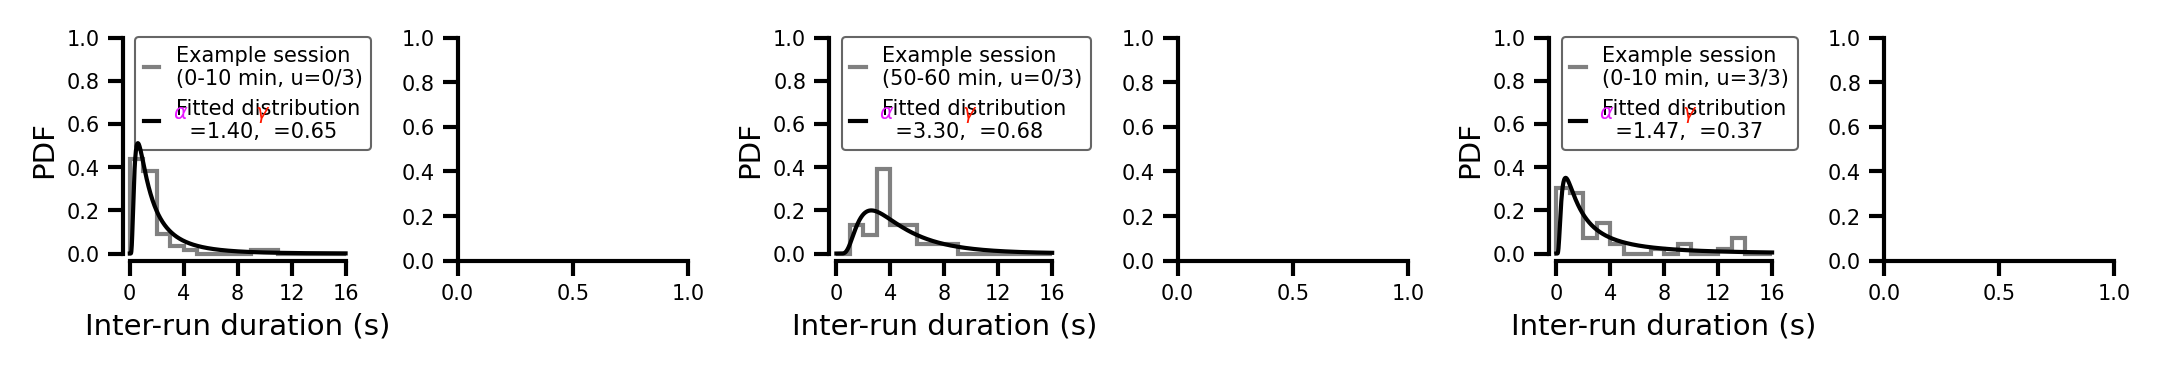

In [5]:
def Figure2_ABC_Left(ax=None, timebin=0, historybin=0, 
                           alphacolor=plt.get_cmap('cool_r')(0.1), gammacolor=plt.get_cmap('autumn')(0.1)):
    if ax is None: 
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    animal='RatM00'
    session='RatM00_2021_07_22_16_13_03'

    idletimes = prepare_data_idle_times(sequence, [animal], [session])
    idletimes = idletimes[animal][timebin][historybin]

    bins=np.linspace(0, 16, 17)
    ydata, xdata, _ = ax.hist(idletimes, bins=bins,
                    color='gray', zorder=4, lw=1,
                    density=True,
                    weights=np.ones_like(idletimes) / len(idletimes),
                    histtype="step")
    # legend hack
    ax.plot([-10, -11], [-10, -11], c='gray', lw=1, label=f"Example session\n({timebin*10}-{(timebin+1)*10} min, u={historybin}/3)")
    
    x = np.linspace(0.01, 16, 1000)
    p, _ = wald_fit(idletimes)
    y = Wald_pdf(x, *p)
    ax.plot(x, y, zorder=10, lw=1, c='k', label=f"Fitted distribution\n  ={p[0]:.2f},  ={p[2]:.2f}")



    ax.set_xlim(0, 16)
    ax.set_xticks([0, 4, 8, 12, 16])
    ax.set_ylim(0, 1)
    ax.set_yticks([0, .2, .4, .6, .8, 1])
    ax.set_xlabel('Inter-run duration (s)')
    ax.set_ylabel('PDF')

    space_axes(ax)
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(.01, 1.05),
                frameon=True, fontsize=5, markerscale=1, handlelength=.75, edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)
    
    ax.text(3.2, 0.625, r'$\alpha$', fontsize=5, color=alphacolor, zorder=10)
    ax.text(9.3, 0.625, r'$\gamma$', fontsize=5, color=gammacolor, zorder=10)

fig, axs = plt.subplots(1, 6, figsize=(cm2inch(18), cm2inch(2.84)),)
Figure2_ABC_Left(axs[0], timebin=0, historybin=0)
Figure2_ABC_Left(axs[2], timebin=5, historybin=0)
Figure2_ABC_Left(axs[4], timebin=0, historybin=3)

# Figure 2D Explanation of the models (α0, αt, αu and γ0, γt, γu)


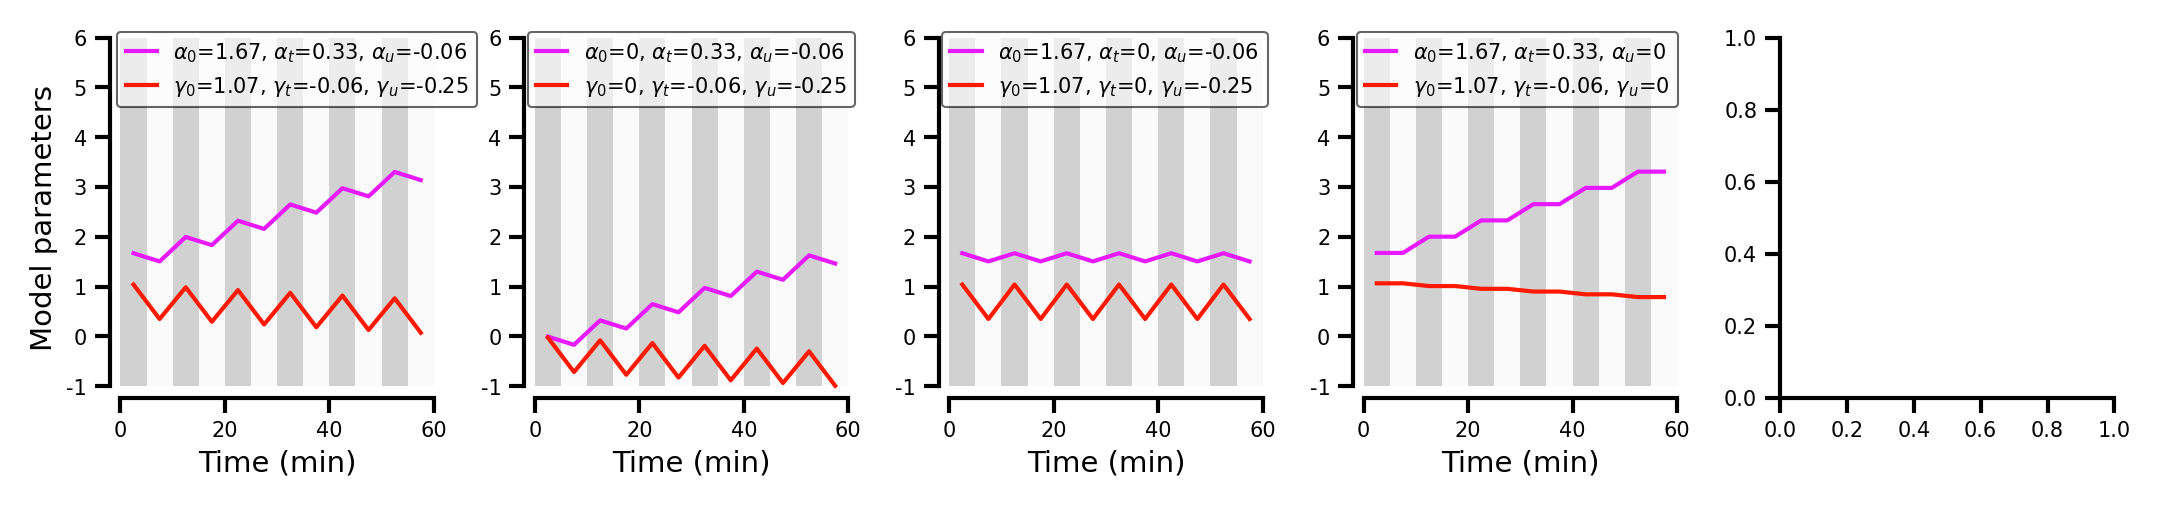

In [10]:
def Figure2D_no_zero(ax=None, show_ylabel=False, show_xlabel=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    N_bins = 6
    N_avg = 4
    ex_alpha, ex_alpha_t, ex_alpha_u, ex_gamma, ex_gamma_t, ex_gamma_u = pickle.load(open("picklejar/example_session_fit_inter_run_duration.p", "rb"))
    ALPHA = np.zeros((N_bins, N_avg))
    GAMMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            ALPHA[bin, avg] = 0 + bin*ex_alpha_t + avg*ex_alpha_u
            GAMMA[bin, avg] = 0 + bin*ex_gamma_t + avg*ex_gamma_u

    a = []
    g = []

    _a, _a0, _at, _au = r'$\alpha$', r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_u$"
    _g, _g0, _gt, _gu = r'$\gamma$', r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$"
    for i in range(6):
        a.append(.9*ALPHA[i][0]+0.1*ALPHA[i][1])
        a.append(.9*ALPHA[i][-1]+0.1*ALPHA[i][-2])
        g.append(.9*GAMMA[i][0]+0.1*GAMMA[i][1])
        g.append(.9*GAMMA[i][-1]+0.1*GAMMA[i][-2])

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [a[i] for i in range(0, len(blocks))], color=plt.get_cmap('cool_r')(0.1), 
            label=f'{_a0}={0:.0f}, {_at}={ex_alpha_t:.2f}, {_au}={ex_alpha_u:.2f}')
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [g[i] for i in range(0, len(blocks))], color=plt.get_cmap('autumn')(0.1), 
            label=f'{_g0}={0:.0f}, {_gt}={ex_gamma_t:.2f}, {_gu}={ex_gamma_u:.2f}')
    
    if show_xlabel:
        ax.set_xlabel("Time (min)")
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(-1, 6)
    ax.set_yticks([-1, 0, 1, 2, 3, 4, 5, 6])
    space_axes(ax)
    if show_ylabel:
        ax.set_ylabel('Model parameters', color='k')

def Figure2D_no_t(ax=None, show_ylabel=False, show_xlabel=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    N_bins = 6
    N_avg = 4
    ex_alpha, ex_alpha_t, ex_alpha_u, ex_gamma, ex_gamma_t, ex_gamma_u = pickle.load(open("picklejar/example_session_fit_inter_run_duration.p", "rb"))
    ALPHA = np.zeros((N_bins, N_avg))
    GAMMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            ALPHA[bin, avg] = ex_alpha + bin*0 + avg*ex_alpha_u
            GAMMA[bin, avg] = ex_gamma + bin*0 + avg*ex_gamma_u

    a = []
    g = []

    _a, _a0, _at, _au = r'$\alpha$', r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_u$"
    _g, _g0, _gt, _gu = r'$\gamma$', r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$"
    for i in range(6):
        a.append(.9*ALPHA[i][0]+0.1*ALPHA[i][1])
        a.append(.9*ALPHA[i][-1]+0.1*ALPHA[i][-2])
        g.append(.9*GAMMA[i][0]+0.1*GAMMA[i][1])
        g.append(.9*GAMMA[i][-1]+0.1*GAMMA[i][-2])

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [a[i] for i in range(0, len(blocks))], color=plt.get_cmap('cool_r')(0.1), 
            label=f'{_a0}={ex_alpha:.2f}, {_at}={0:.0f}, {_au}={ex_alpha_u:.2f}')
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [g[i] for i in range(0, len(blocks))], color=plt.get_cmap('autumn')(0.1), 
            label=f'{_g0}={ex_gamma:.2f}, {_gt}={0:.0f}, {_gu}={ex_gamma_u:.2f}')

    if show_xlabel:
        ax.set_xlabel("Time (min)")
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(-1, 6)
    ax.set_yticks([-1, 0, 1, 2, 3, 4, 5, 6])
    space_axes(ax)
    if show_ylabel:
        ax.set_ylabel('Model parameters', color='k')

def Figure2D_no_u(ax=None, show_ylabel=False, show_xlabel=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    N_bins = 6
    N_avg = 4
    ex_alpha, ex_alpha_t, ex_alpha_u, ex_gamma, ex_gamma_t, ex_gamma_u = pickle.load(open("picklejar/example_session_fit_inter_run_duration.p", "rb"))
    ALPHA = np.zeros((N_bins, N_avg))
    GAMMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            ALPHA[bin, avg] = ex_alpha + bin*ex_alpha_t + avg*0
            GAMMA[bin, avg] = ex_gamma + bin*ex_gamma_t + avg*0

    a = []
    g = []

    _a, _a0, _at, _au = r'$\alpha$', r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_u$"
    _g, _g0, _gt, _gu = r'$\gamma$', r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$"
    for i in range(6):
        a.append(.9*ALPHA[i][0]+0.1*ALPHA[i][1])
        a.append(.9*ALPHA[i][-1]+0.1*ALPHA[i][-2])
        g.append(.9*GAMMA[i][0]+0.1*GAMMA[i][1])
        g.append(.9*GAMMA[i][-1]+0.1*GAMMA[i][-2])

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [a[i] for i in range(0, len(blocks))], color=plt.get_cmap('cool_r')(0.1), 
            label=f'{_a0}={ex_alpha:.2f}, {_at}={ex_alpha_t:.2f}, {_au}={0:.0f}')
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [g[i] for i in range(0, len(blocks))], color=plt.get_cmap('autumn')(0.1), 
            label=f'{_g0}={ex_gamma:.2f}, {_gt}={ex_gamma_t:.2f}, {_gu}={0:.0f}')
    
    if show_xlabel:
        ax.set_xlabel("Time (min)")
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(-1, 6)
    ax.set_yticks([-1, 0, 1, 2, 3, 4, 5, 6])
    space_axes(ax)
    if show_ylabel:
        ax.set_ylabel('Model parameters', color='k')

def Figure2D_all(ax=None, show_ylabel=False, show_xlabel=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    N_bins = 6
    N_avg = 4
    ex_alpha, ex_alpha_t, ex_alpha_u, ex_gamma, ex_gamma_t, ex_gamma_u = pickle.load(open("picklejar/example_session_fit_inter_run_duration.p", "rb"))
    ALPHA = np.zeros((N_bins, N_avg))
    GAMMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            ALPHA[bin, avg] = ex_alpha + bin*ex_alpha_t + avg*ex_alpha_u
            GAMMA[bin, avg] = ex_gamma + bin*ex_gamma_t + avg*ex_gamma_u

    a = []
    g = []

    _a, _a0, _at, _au = r'$\alpha$', r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_u$"
    _g, _g0, _gt, _gu = r'$\gamma$', r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_u$"

    for i in range(6):
        a.append(.9*ALPHA[i][0]+0.1*ALPHA[i][1])
        a.append(.9*ALPHA[i][-1]+0.1*ALPHA[i][-2])
        g.append(.9*GAMMA[i][0]+0.1*GAMMA[i][1])
        g.append(.9*GAMMA[i][-1]+0.1*GAMMA[i][-2])

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [a[i] for i in range(0, len(blocks))], color=plt.get_cmap('cool_r')(0.1), 
            label=f'{_a0}={ex_alpha:.2f}, {_at}={ex_alpha_t:.2f}, {_au}={ex_alpha_u:.2f}')
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [g[i] for i in range(0, len(blocks))], color=plt.get_cmap('autumn')(0.1), 
            label=f'{_g0}={ex_gamma:.2f}, {_gt}={ex_gamma_t:.2f}, {_gu}={ex_gamma_u:.2f}')
    
    if show_xlabel:
        ax.set_xlabel("Time (min)")
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(-1, 6)
    ax.set_yticks([-1, 0, 1, 2, 3, 4, 5, 6])
    space_axes(ax)
    if show_ylabel:
        ax.set_ylabel('Model parameters', color='k')

fig, ax = plt.subplots(1, 5, figsize=(cm2inch(18), cm2inch(4)))
Figure2D_all(ax=ax[0], show_ylabel=True)
Figure2D_no_zero(ax=ax[1])
Figure2D_no_t(ax=ax[2])
Figure2D_no_u(ax=ax[3])

for _ax, x in zip(ax, [0.042, .235, .43, .625]):
    # This is a hack to get the legend to not mess up the spacing
    handles, labels = _ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    fig.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(x, 0.99),
                            frameon=True, fontsize=5, markerscale=1, handlelength=1.5,
                            edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)


# Figure 2E Experimental data and model fit

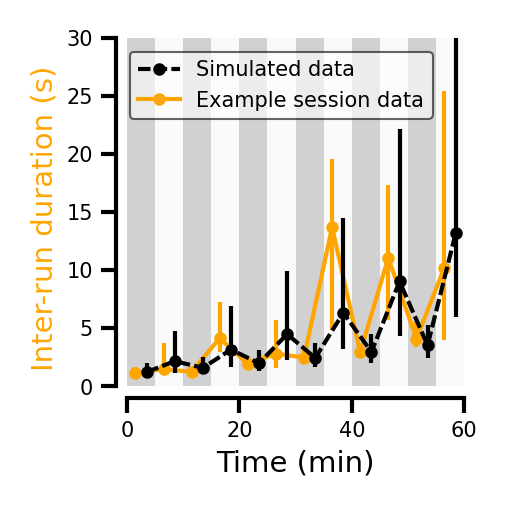

In [11]:
def Figure2E(root, ax=None, show_ylabel=False):
    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)
    
    ax.set_xlabel("Time (min)")
    if show_ylabel:
        ax.set_ylabel("Inter-run duration (s)", color='orange')
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(0, 30)
    # ax.set_yticks([0, 5, 10, 15])
    space_axes(ax)


    # experimental rat data
    animal='RatM00'
    session='RatM00_2021_07_22_16_13_03'

    _params = get_from_pickle(root, animal, session, name="params.p")
    blocks = _params['blocks']
    rewardProbaBlock = _params['rewardProbaBlock']
    example_runningTimeInLeftBin, example_runningTimeInRightBin = get_from_pickle(root, animal, session, name="timeinZone.p")
    data = [example_runningTimeInLeftBin[i]+example_runningTimeInRightBin[i] for i in range(0, 12)]

    data_medians = [np.median(data[i]) for i in range(12)]
    data_bot_percentiles = [np.percentile(data[i], 25) for i in range(12)]
    data_top_percentiles = [np.percentile(data[i], 75) for i in range(12)]
        
    ax.errorbar([-1+(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
                data_medians,
                yerr=[[data_medians[i]-data_bot_percentiles[i] for i in range(12)], [data_top_percentiles[i]-data_medians[i] for i in range(12)]],
                marker='o', ms=2, color='orange', 
                zorder=4, alpha=1)


    # fit, generate samples from distribution with fit parameters, take median
    N_bins = 6
    N_avg = 4
    ex_alpha, ex_alpha_t, ex_alpha_u, ex_gamma, ex_gamma_t, ex_gamma_u = pickle.load(open("picklejar/example_session_fit_inter_run_duration.p", "rb"))
    ALPHA = np.zeros((N_bins, N_avg))
    GAMMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            ALPHA[bin, avg] = ex_alpha + bin*ex_alpha_t + avg*ex_alpha_u
            GAMMA[bin, avg] = ex_gamma + bin*ex_gamma_t + avg*ex_gamma_u

    a = []
    g = []
    for i in range(6):
        a.append(.9*ALPHA[i][0]+0.1*ALPHA[i][1])
        a.append(.9*ALPHA[i][-1]+0.1*ALPHA[i][-2])
        g.append(.9*GAMMA[i][0]+0.1*GAMMA[i][1])
        g.append(.9*GAMMA[i][-1]+0.1*GAMMA[i][-2])

    res = [generate_idle_time(a[i], g[i], 1000) for i in range(12)]
    medians = [np.median(res[i]) for i in range(12)]
    bot_percentiles = [np.percentile(res[i], 25) for i in range(12)]
    top_percentiles = [np.percentile(res[i], 75) for i in range(12)]

    ax.errorbar([1+(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
                medians,
                yerr=[[medians[i]-bot_percentiles[i] for i in range(12)], [top_percentiles[i]-medians[i] for i in range(12)]],
                color='k', marker='o', ms=2, ls=(0, (3, 1)), zorder=5)
    
    ax.plot([-100, -101], [-100, -101], color='k', marker='o', ms=2, ls=(0, (3, 1)), label='Simulated data', zorder=5)
    ax.plot([-100, -101], [-100, -101], marker='o', ms=2, color='orange', zorder=4, alpha=1, label='Example session data')
   

    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, 0.99), handlelength=2,
              frameon=True, fontsize=5, markerscale=1, edgecolor='k', 
              facecolor='w').get_frame().set_linewidth(.5)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))

Figure2E(root, ax=ax, show_ylabel=True)

# Figure 2: Model-based quantification of intra-session dynamics of inter-run duration.

alpha: 1.57, gamma: 0.86
alpha: 2.96, gamma: 1.02
alpha: 1.72, gamma: 0.38


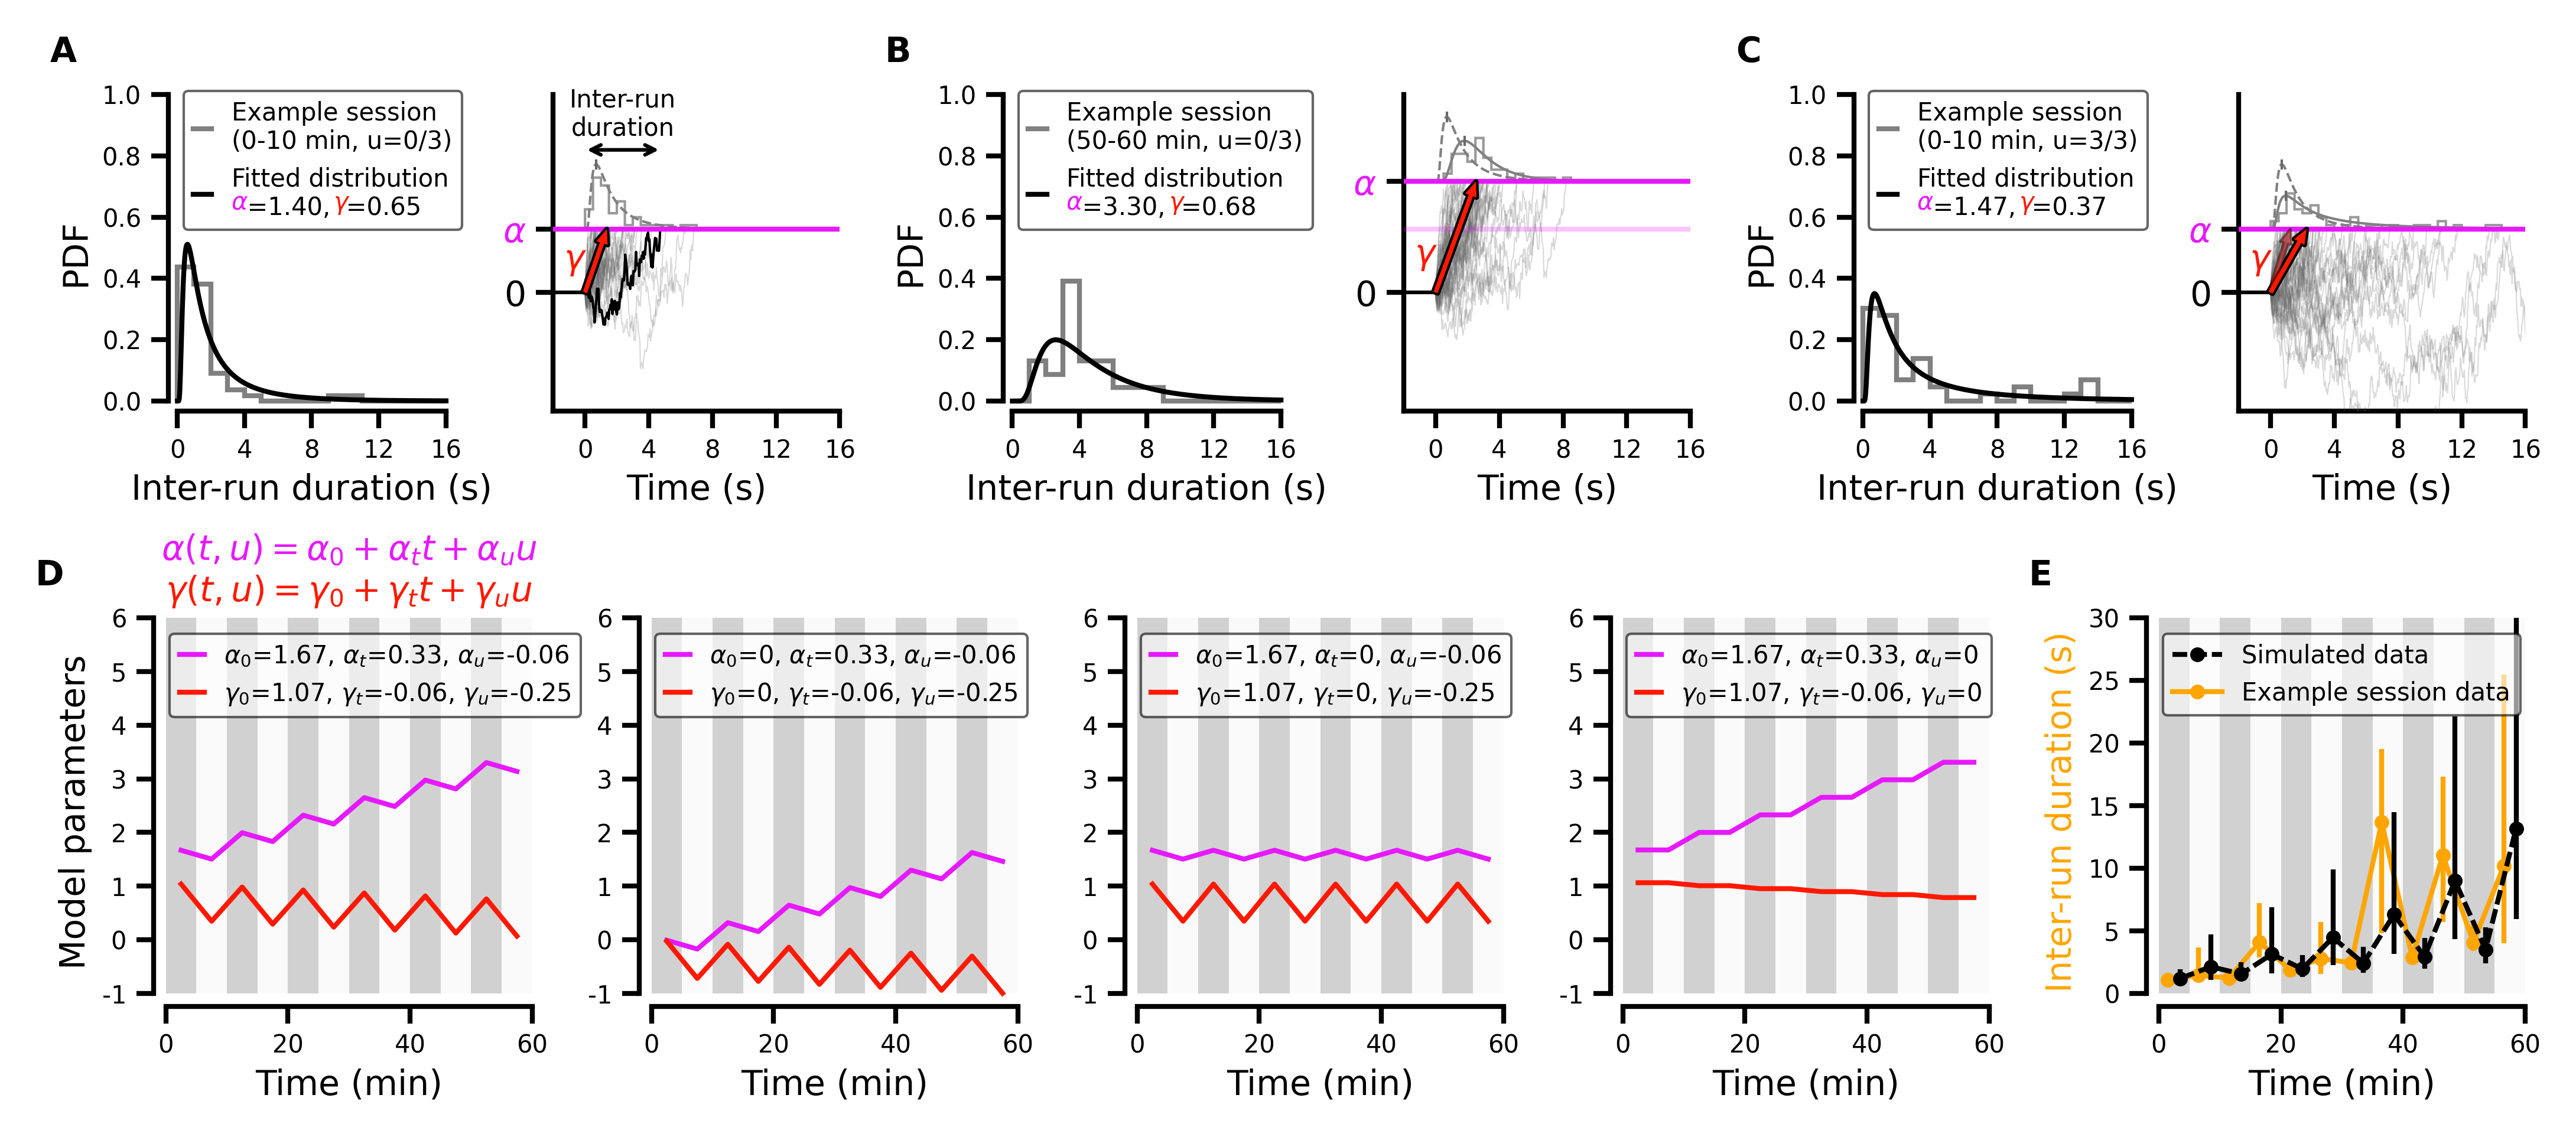

In [13]:
fig = plt.figure(figsize=(cm2inch(18), cm2inch(7.5)), 
                 constrained_layout=True, facecolor='w', dpi=600)


gs = fig.add_gridspec(2, 1, height_ratios=[1, 1])

gs0 = gs[0].subgridspec(2, 6, height_ratios=[1, .1])
fit_base = plt.subplot(gs0[0, 0])
drift_diffusion_base = plt.subplot(gs0[0, 1])
fit_alpha = plt.subplot(gs0[0, 2])
drift_diffusion_alpha = plt.subplot(gs0[0, 3])
fit_gamma = plt.subplot(gs0[0, 4])
drift_diffusion_gamma = plt.subplot(gs0[0, 5])

gs1 = gs[1].subgridspec(1, 5, width_ratios=[1, 1, 1, 1, 1])
explanation_0tu = plt.subplot(gs1[0])
explanation_0 = plt.subplot(gs1[1])
explanation_t = plt.subplot(gs1[2])
explanation_u = plt.subplot(gs1[3])
model_0tu = plt.subplot(gs1[4])


Figure2_ABC_Left(fit_base, timebin=0, historybin=0)
Figure2_ABC_Left(fit_alpha, timebin=5, historybin=0)
Figure2_ABC_Left(fit_gamma, timebin=0, historybin=3)

x, y = Figure2_ABC_Right(ax=drift_diffusion_base, A=8, mean=.22, base=True)
Figure2_ABC_Right(ax=drift_diffusion_alpha, A=14, mean=.22, base=False, xx=x, yy=y, plot_base_a=True)
Figure2_ABC_Right(ax=drift_diffusion_gamma, A=8, mean=.08, base=False, xx=x, yy=y, plot_base_g=True)

Figure2D_no_zero(ax=explanation_0)
Figure2D_no_t(ax=explanation_t)
Figure2D_no_u(ax=explanation_u)
Figure2D_all(ax=explanation_0tu, show_ylabel=True)

Figure2E(root, ax=model_0tu, show_ylabel=True)


fig.canvas.draw()
fig_axes = fig.axes
bounds = [_ax.get_position().bounds for _ax in fig_axes]
fig.set_constrained_layout(False)

# This is a hack to get the legend to not mess up the spacing
for ax in [explanation_0tu, explanation_0, explanation_t, explanation_u]:
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, .99),
                            frameon=True, fontsize=5, markerscale=1, handlelength=1,
                            edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)

for i, ax in enumerate(fig_axes):
    ax.set_position(bounds[i])
fig.canvas.draw()

equ_alpha=r'$\alpha(t, u) = \alpha_0 + \alpha_t t + \alpha_u u$'
equ_gamma=r'$\gamma(t, u) = \gamma_0 + \gamma_t t + \gamma_u u$'
x = bounds[6][0] + bounds[6][2]/2
y = bounds[6][1] + bounds[6][3] + 0.025
fig.text(x, y+0.04, equ_alpha, ha='center', va='center', fontsize=7, figure=fig, color=plt.get_cmap('cool_r')(0.1))
fig.text(x, y, equ_gamma, ha='center', va='center', fontsize=7, figure=fig, color=plt.get_cmap('autumn')(0.1))


for ax, letter, x_rel in zip([fit_base, fit_alpha, fit_gamma, explanation_0tu, model_0tu], 
                      ["A", "B", "C", "D", "E"], [-0.45, -0.45, -0.45, -0.3, -0.3]):
    letter_on_subplot(ax, letter)



plt.savefig("./Figures_paper/Figure_2.pdf", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_2.svg", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="svg", dpi=600)